# **Desafio - Cientista de Dados**

***

# Objetivo

Realizar uma análise exploratória dos dados do maior concorrente e desenvolver um modelo para prever preços de aluguéis temporários em Nova York, otimizando a estratégia de precificação dos imóveis

# Importando biliotecas

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

from wordcloud import WordCloud

# Acessando datasets e limpando-os

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/isadoralucena/ds-challenge/main/data/dataset.csv')

In [3]:
df.shape

(48894, 16)

In [4]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
df.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [9]:
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [12]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [13]:
df['ultima_review'] = pd.to_datetime(df['ultima_review'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             48894 non-null  int64         
 1   nome                           48878 non-null  object        
 2   host_id                        48894 non-null  int64         
 3   host_name                      48873 non-null  object        
 4   bairro_group                   48894 non-null  object        
 5   bairro                         48894 non-null  object        
 6   latitude                       48894 non-null  float64       
 7   longitude                      48894 non-null  float64       
 8   room_type                      48894 non-null  object        
 9   price                          48894 non-null  int64         
 10  minimo_noites                  48894 non-null  int64         
 11  numero_de_revie

In [15]:
df['room_type']

0        Entire home/apt
1           Private room
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
48889       Private room
48890       Private room
48891    Entire home/apt
48892        Shared room
48893       Private room
Name: room_type, Length: 48894, dtype: object

In [16]:
df['room_type'] = df['room_type'].astype('category')

In [17]:
df['room_type']

0        Entire home/apt
1           Private room
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
48889       Private room
48890       Private room
48891    Entire home/apt
48892        Shared room
48893       Private room
Name: room_type, Length: 48894, dtype: category
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

In [18]:
df['bairro_group']

0        Manhattan
1        Manhattan
2         Brooklyn
3        Manhattan
4        Manhattan
           ...    
48889     Brooklyn
48890     Brooklyn
48891    Manhattan
48892    Manhattan
48893    Manhattan
Name: bairro_group, Length: 48894, dtype: object

In [19]:
df['bairro_group'] = df['bairro_group'].astype('category')

In [20]:
df['bairro_group']

0        Manhattan
1        Manhattan
2         Brooklyn
3        Manhattan
4        Manhattan
           ...    
48889     Brooklyn
48890     Brooklyn
48891    Manhattan
48892    Manhattan
48893    Manhattan
Name: bairro_group, Length: 48894, dtype: category
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [21]:
df['bairro'] = df['bairro'].astype('category')

In [22]:
df['bairro']

0                   Midtown
1                    Harlem
2              Clinton Hill
3               East Harlem
4               Murray Hill
                ...        
48889    Bedford-Stuyvesant
48890              Bushwick
48891                Harlem
48892        Hell's Kitchen
48893        Hell's Kitchen
Name: bairro, Length: 48894, dtype: category
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']

# Análise exploratória

- Região e preço 

Suposição: Imóveis em Manhattan tendem a ser mais caros devido à localização privilegiada, próxima a áreas turísticas e comerciais, aumentando a demanda e o valor

In [23]:
mapa_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
heat_data = df[['latitude', 'longitude', 'price']].dropna().values.tolist()
HeatMap(heat_data, radius=10, blur=15, max_zoom=20).add_to(mapa_nyc)
mapa_nyc

O mapa de calor acima ilustra a distribuição dos preços de aluguéis temporários em Nova York. As áreas em tons mais quentes (amarelo e vermelho) indicam regiões com preços médios mais altos, como é o caso de Manhattan, onde há maior concentração de imóveis de luxo e proximidade com pontos turísticos. Já as áreas em tons mais frios (azul e verde) representam regiões com preços mais acessíveis, como partes do Bronx e Staten Island. O gradiente de cores permite observar a transição entre essas zonas de forma clara, destacando bairros emergentes com preços em crescimento."

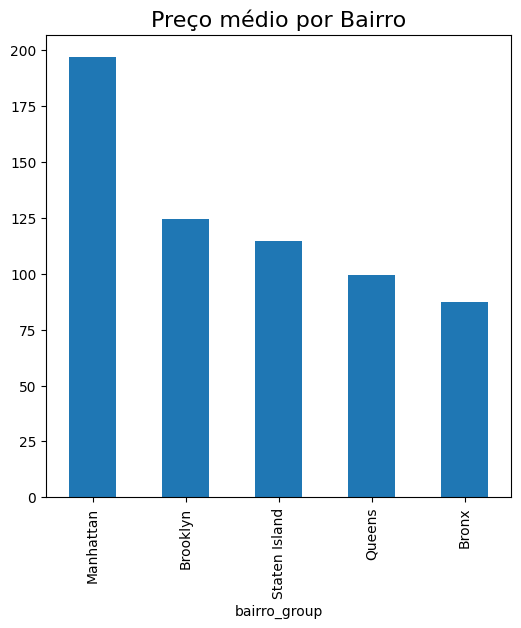

In [24]:
avg_price_per_bairro = df.groupby('bairro_group', observed=True)['price'].mean().sort_values(ascending=False)
avg_price_per_bairro.plot(kind='bar', figsize=(6, 6))
plt.title('Preço médio por Bairro', fontsize=16)
plt.show()

- Tipo de acomodação e preço

Suposição: Apartamentos inteiros têm preços mais altos que quartos, pois oferecem mais privacidade e espaço, agregando valor à experiência do hóspede.

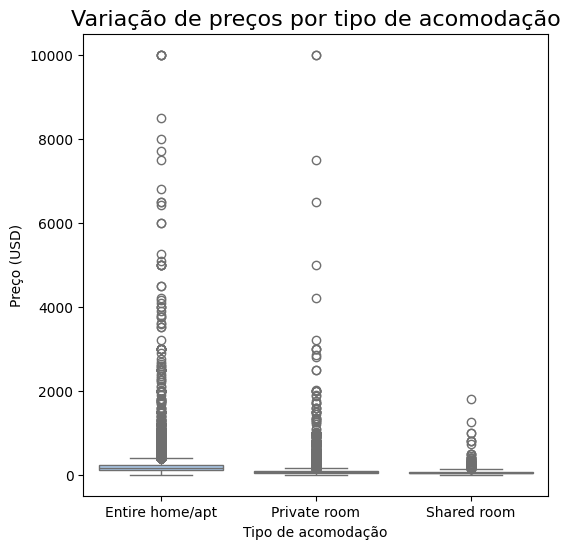

In [25]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='room_type', y='price', data=df, hue='room_type', palette='pastel', legend=False)
plt.title('Variação de preços por tipo de acomodação', fontsize=16)
plt.xlabel('Tipo de acomodação')
plt.ylabel('Preço (USD)')
plt.show()

O gráfico acima mostra a distribuição dos preços de aluguel em Nova York para três tipos de acomodações: apartamento inteiro, quarto privado e quarto compartilhado. Como esperado, apartamentos inteiros têm os preços mais altos, com uma grande variação, enquanto quartos privados e compartilhados têm preços mais baixos e uma menor variação. Essa diferença nos preços reflete as características e a demanda por cada tipo de acomodação.

- Popularidade do imóvel

Suposição: Imóveis com muitas avaliações tendem a ser mais caros, já que a popularidade indica confiança e qualidade, atraindo hóspedes dispostos a pagar mais

In [26]:
correlation = df['numero_de_reviews'].corr(df['price'])
print(f'Coeficiente de correlação: {correlation}')

Coeficiente de correlação: -0.04795437857598285


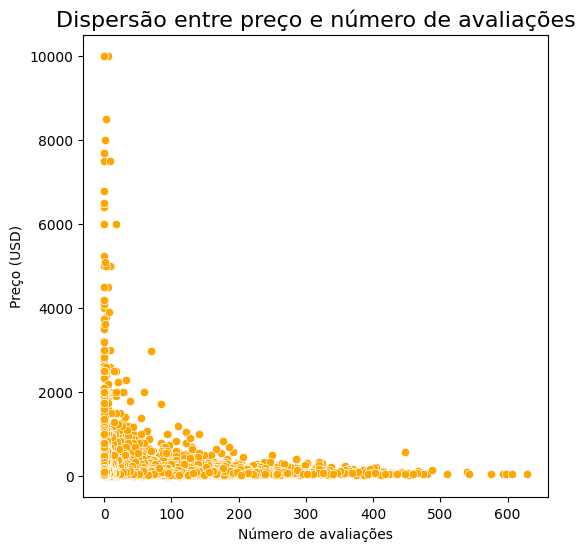

In [27]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='numero_de_reviews', y='price', data=df, color='orange')
plt.title('Dispersão entre preço e número de avaliações', fontsize=16)
plt.xlabel('Número de avaliações')
plt.ylabel('Preço (USD)')
plt.show()

A análise da relação entre o preço e o número de avaliações dos imóveis revela alguns padrões interessantes. Observou-se uma alta concentração de imóveis com poucas avaliações, predominando aqueles com preços baixos, apesar de haver alguma dispersão. Isso sugere que esses imóveis, geralmente novos ou menos populares, tendem a ter preços mais acessíveis para atrair hóspedes. Além disso, a variação dos preços é maior entre os imóveis com poucas avaliações, indicando que os proprietários ajustam os valores para encontrar um equilíbrio entre atratividade e rentabilidade.

Conforme o número de avaliações aumenta, a dispersão dos preços diminui, sugerindo uma estabilização na precificação dos imóveis mais bem avaliados. Esse comportamento pode indicar que a popularidade e a confiança gerada pelas avaliações permitem uma estratégia de precificação mais competitiva, tornando os preços mais previsíveis.

Essa tendência, no entanto, não é muito forte. O coeficiente de correlação de -0.048 indica uma relação muito fraca e negativa entre preço e número de avaliações. Embora haja uma leve inclinação para preços mais baixos conforme o número de avaliações cresce, essa relação é pouco significativa e não linear, sugerindo que outros fatores desempenham um papel mais relevante na definição dos preços dos imóveis. Em resumo, embora a quantidade de avaliações possa ter alguma influência na precificação, ela não é o único fator determinante.

- Influência da disponibilidade do imóvel

Suposição: Imóveis disponíveis por mais dias no ano podem ter preços mais baixos, visando maior ocupação e compensando com volume de reservas

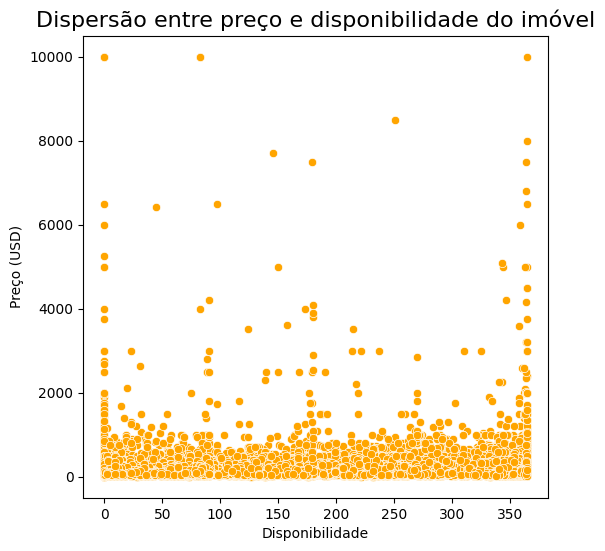

In [28]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df, color='orange')
plt.title('Dispersão entre preço e disponibilidade do imóvel', fontsize=16)
plt.xlabel('Disponibilidade')
plt.ylabel('Preço (USD)')
plt.show()

O gráfico de dispersão entre preço e disponibilidade do imóvel mostra que, independentemente do nível de disponibilidade, os preços se mantêm constantes. Isso indica que a variação na disponibilidade não exerce grande influência sobre a determinação dos preços. Em outras palavras, imóveis com alta ou baixa disponibilidade tendem a ter preços similares, sugerindo que outros fatores (como localização, tipo de imóvel ou avaliações) podem ser mais determinantes na definição do valor cobrado.

In [29]:
correlation = df['disponibilidade_365'].corr(df['price'])
print(f'Coeficiente de correlação: {correlation}')

Coeficiente de correlação: 0.08183250775771082


O coeficiente de correlação 0.0818 indica uma correlação positiva muito fraca entre o preço e a disponibilidade do imóvel. Isso significa que, à medida que a disponibilidade aumenta, o preço tende a aumentar ligeiramente, mas essa relação é tão fraca que praticamente não há um padrão significativo entre essas variáveis.

- Anfitriões com muitos imóveis oferecem preços mais baixos

Suposição: Anfitriões com vários imóveis oferecem preços mais baixos devido à competitividade e gestão em escala, focando em volume de hospedagens

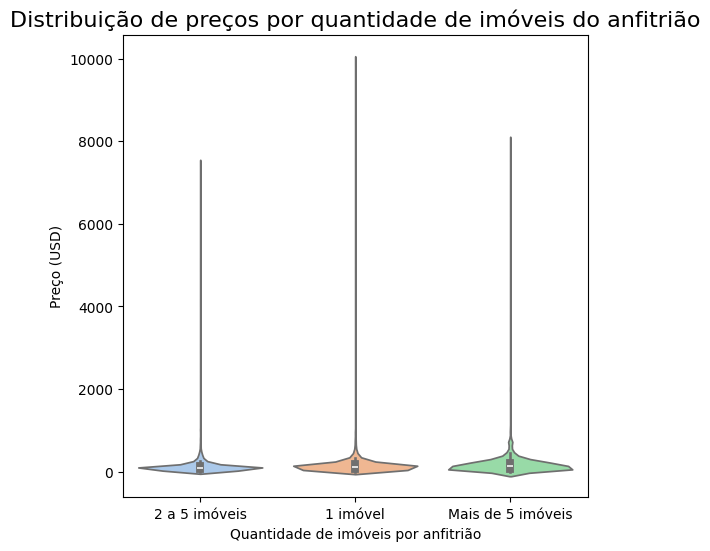

In [30]:
def categorize_host(n):
    if n == 1:
        return '1 imóvel'
    elif 2 <= n <= 5:
        return '2 a 5 imóveis'
    else:
        return 'Mais de 5 imóveis'

df['host_category'] = df['calculado_host_listings_count'].apply(categorize_host)
plt.figure(figsize=(6, 6))
sns.violinplot(x='host_category', y='price', data=df, hue='host_category', palette='pastel', legend=False)
plt.title('Distribuição de preços por quantidade de imóveis do anfitrião', fontsize=16)
plt.xlabel('Quantidade de imóveis por anfitrião')
plt.ylabel('Preço (USD)')
plt.show()

A análise do gráfico mostra que a distribuição dos preços é semelhante entre as categorias de anfitriões, indicando que o número de imóveis não influencia fortemente o preço. A maioria dos preços está concentrada em valores baixos, sugerindo uma oferta maior de acomodações acessíveis. Além disso, há outliers extremos, possivelmente relacionados a propriedades premium ou localizações exclusivas. Por fim, anfitriões com mais imóveis não necessariamente cobram mais caro, o que sugere que fatores como localização e tipo de imóvel têm maior impacto nos preços do que a experiência do anfitrião.

- Mínimo de noites e preço

Suposição: Imóveis com mínimo de noites alto podem ter diárias mais baratas, compensando com estadias mais longas e maior ocupação

In [31]:
correlation = df['minimo_noites'].corr(df['price'])
print(f'Coeficiente de correlação: {correlation}')

Coeficiente de correlação: 0.04279927891945842


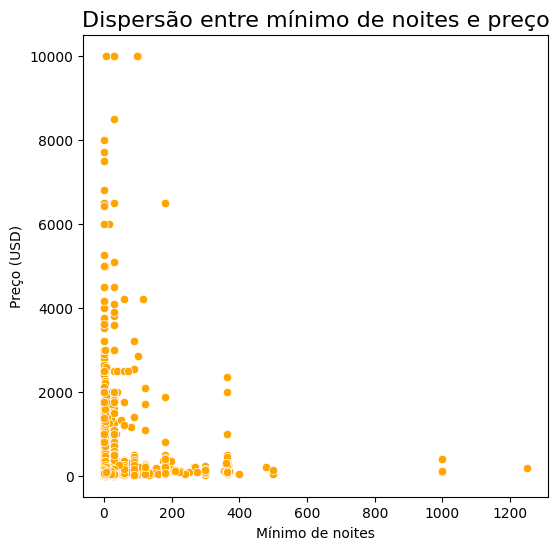

In [32]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='minimo_noites', y='price', data=df, color='orange')
plt.title('Dispersão entre mínimo de noites e preço', fontsize=16)
plt.xlabel('Mínimo de noites')
plt.ylabel('Preço (USD)')
plt.show()

A análise da correlação entre o número mínimo de noites e o preço do aluguel de imóveis revela uma relação bastante fraca, como indicado pelo coeficiente de correlação de 0.04. Esse valor próximo de zero sugere que não há uma conexão linear significativa entre essas duas variáveis.

O gráfico de dispersão também ilustra essa relação, mostrando que, para números menores de noites, o preço do aluguel apresenta uma maior variação, com valores mais dispersos ao longo do eixo de preços. No entanto, à medida que o número de noites aumenta, observa-se que os preços tendem a se concentrar em valores mais baixos e com menor variação. Isso sugere que, enquanto para estadias curtas o preço é mais volátil, para estadias mais longas ele se estabiliza e se mantém mais constante, geralmente em patamares mais baixos.

Essa dinâmica reforça a ideia de que, embora a correlação entre o número de noites e o preço do aluguel seja fraca, a variabilidade do preço está mais associada a períodos curtos, enquanto estadias mais longas apresentam preços mais consistentes.

- Frequência de avaliações e preço

Suposição: Avaliações frequentes justificam preços mais altos, pois indicam experiência consistente e qualidade, reforçando a confiança dos hóspedes

In [33]:
correlation = df['reviews_por_mes'].corr(df['price'])
print(f'Coeficiente de correlação: {correlation}')

Coeficiente de correlação: -0.05056442448824598


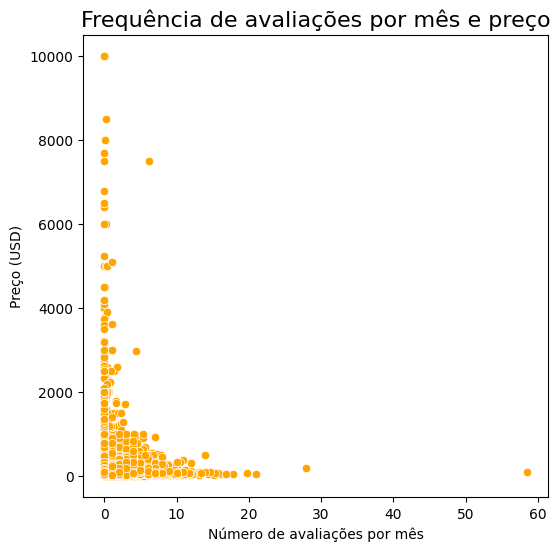

In [34]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='reviews_por_mes', y='price', data=df, color='orange')
plt.title('Frequência de avaliações por mês e preço', fontsize=16)
plt.xlabel('Número de avaliações por mês')
plt.ylabel('Preço (USD)')
plt.show()

A correlação entre o preço dos imóveis e a frequência de avaliações é muito fraca, com um coeficiente de correlação de -0.0306. Isso indica uma relação quase inexistente entre essas variáveis. No gráfico de dispersão, os pontos estão distribuídos de forma aleatória, sem um padrão claro. O valor negativo sugere uma leve tendência inversa, onde imóveis com mais avaliações podem ter preços um pouco mais baixos, mas essa relação é tão fraca que não é significativa. Em resumo, a frequência de avaliações não é um bom preditor para o preço dos imóveis, que é mais influenciado por outros fatores.

# Modelo preditivo e avaliação

## Removendo outliers de preço

In [35]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

df_without_outliers = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

print(f"Antes: {df.shape[0]} registros")
print(f"Depois: {df_without_outliers.shape[0]} registros")
print(f"Registros removidos: {df.shape[0] - df_without_outliers.shape[0]}")

df_without_outliers.head()

Antes: 48894 registros
Depois: 45922 registros
Registros removidos: 2972


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,host_category
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2 a 5 imóveis
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,1 imóvel
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1 imóvel
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1 imóvel
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1 imóvel


In [36]:
x = df_without_outliers[['latitude', 'longitude', 'bairro_group', 'room_type', 
        'disponibilidade_365', 'numero_de_reviews', 'minimo_noites']]
y = df_without_outliers['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['latitude', 'longitude', 
                                   'disponibilidade_365', 'numero_de_reviews', 'minimo_noites'
                                   ]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['bairro_group', 'room_type'])
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Erro quadrático médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"Coeficiente de determinação R²: {r2}")

Erro quadrático médio (MSE): 2482.380484667571
Raiz do erro quadrático médio (RMSE): 49.82349330052612
Coeficiente de determinação R²: 0.46472843914587025


Para avaliar o desempenho do modelo, foram usadas três métricas principais. O Erro Quadrático Médio (MSE), que calcula a média dos quadrados dos erros entre os valores reais e os previstos, indicou um erro médio de 2482.38 unidades. O RMSE (Raiz do Erro Quadrático Médio), que traz o erro para a mesma unidade dos dados originais, resultou em um valor de 49.82, mostrando o erro médio de aproximadamente 49.82 unidades no preço de aluguel. Por fim, o Coeficiente de Determinação (R²) foi de 0.4647, o que significa que o modelo explica cerca de 46% da variabilidade nos preços de aluguel

# Perguntas

## Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Se essa pessoa busca um retorno rápido e está disposta a investir um valor mais alto, Manhattan e Brooklyn são as melhores opções. Esses bairros são conhecidos por sua alta demanda e preços de aluguel elevados, garantindo um fluxo constante de turistas e profissionais. No entanto, é importante estar ciente de que os custos de compra nesses locais são significativamente mais altos, o que pode exigir um investimento inicial considerável.

Por outro lado, se o investidor prefere uma estratégia de investimento com custo inicial mais baixo e um potencial de valorização futura, os bairros emergentes podem ser a escolha ideal. Áreas como Queens e partes do Bronx estão se tornando cada vez mais atrativas devido ao crescimento imobiliário e à melhoria da infraestrutura. Esses locais oferecem preços de compra mais acessíveis e uma boa disponibilidade, representando uma oportunidade interessante para quem pensa a médio e longo prazo.

## O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

A análise dos dados mostra que há uma certa constância na relação entre a disponibilidade (disponibilidade_365) e os preços dos imóveis, indicando que essa variável não influencia significativamente os valores. Por outro lado, o número mínimo de noites (minimum_nights) tem um impacto mais claro: para estadias curtas, os preços variam bastante, podendo ser mais altos, enquanto para estadias longas, os valores tendem a ser mais baixos e estáveis. Isso sugere que, embora a disponibilidade não seja tão decisiva, a duração da estadia e o público-alvo desempenham um papel importante na definição dos preços.

## Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [38]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palavras mais comuns em imóveis de alto valor:
         frequency
bedroom       2501
apart         2137
apt           1808
studio        1402
east          1266
luxuri        1182
park          1164
villag        1150
loft          1029
spaciou       1003

Palavras mais comuns em imóveis de baixo valor:
           frequency
room            9953
privat          6332
bedroom         5946
apart           4032
cozi            3967
brooklyn        3312
apt             2934
studio          2718
manhattan       2595
spaciou         2395


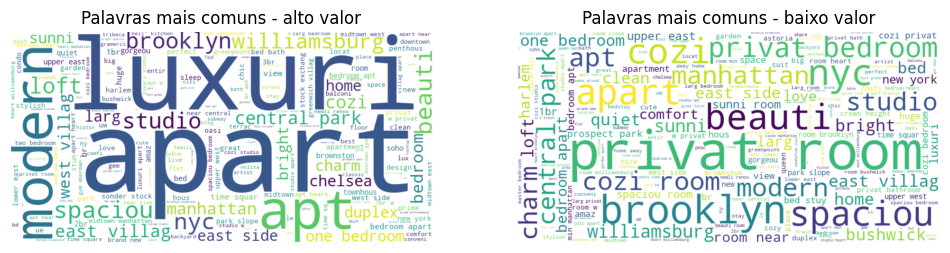

In [39]:
def preprocess_text(text):
    words = [word for word in text.split() if word.lower() not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

df['nome'] = df['nome'].fillna('').astype(str)
df['processed_name'] = df['nome'].apply(preprocess_text)

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

high_value_threshold = df['price'].mean()
high_value_df = df[df['price'] > high_value_threshold]
low_value_df = df[df['price'] <= high_value_threshold]

vectorizer = CountVectorizer()
high_value_words = vectorizer.fit_transform(high_value_df['processed_name'])
high_value_word_counts = pd.DataFrame(high_value_words.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
high_value_word_counts.columns = ['frequency']
high_value_word_counts = high_value_word_counts.sort_values(by='frequency', ascending=False)

low_value_words = vectorizer.transform(low_value_df['processed_name'])
low_value_word_counts = pd.DataFrame(low_value_words.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
low_value_word_counts.columns = ['frequency']
low_value_word_counts = low_value_word_counts.sort_values(by='frequency', ascending=False)

print("Palavras mais comuns em imóveis de alto valor:")
print(high_value_word_counts.head(10))

print("\nPalavras mais comuns em imóveis de baixo valor:")
print(low_value_word_counts.head(10))

high_value_text = " ".join(high_value_df['processed_name'])
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate(high_value_text)

low_value_text = " ".join(low_value_df['processed_name'])
wordcloud_low = WordCloud(width=800, height=400, background_color='white').generate(low_value_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title("Palavras mais comuns - alto valor")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title("Palavras mais comuns - baixo valor")
plt.axis('off')

plt.show()

A análise das palavras mais frequentes nos nomes dos imóveis revela uma clara relação entre o texto dos anúncios e o valor dos aluguéis. Em imóveis de alto valor, termos como "luxury", "park" e "spacious" predominam, refletindo características como luxo, localização privilegiada e comodidades especiais, que justificam preços mais elevados. Por outro lado, em imóveis de baixo valor, palavras como "room", "private" e "cozy" são mais comuns, indicando acomodações simples, compartilhadas ou em áreas menos valorizadas, o que resulta em preços mais acessíveis. Essa distinção mostra como o texto do anúncio pode influenciar a percepção de valor e ajudar a segmentar o público-alvo.

## Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê? 

O objetivo deste trabalho foi realizar uma análise dos dados do maior concorrente e desenvolver um modelo para prever os preços de aluguéis temporários em Nova York, otimizando a estratégia de precificação dos imóveis. Utilizaram-se variáveis como latitude, longitude, bairro, tipo de quarto, disponibilidade, número de avaliações e número mínimo de noites para treinar o modelo. Essas variáveis foram escolhidas por influenciarem diretamente no preço dos aluguéis, seja por fatores de localização, popularidade do imóvel ou restrições de reserva.

O problema que foi resolvido é um problema de **regressão**, já que a tarefa é prever o preço do aluguel, que é uma variável contínua. Para isso, foi utilizado um modelo de **regressão múltipla simples**, que se adapta bem a esse tipo de tarefa, permitindo entender a relação linear entre as variáveis independentes e o preço do aluguel. Embora seja um modelo simples, ele fornece bons insights iniciais e é rápido para treinar.

A avaliação do modelo foi feita com as métricas **Erro Quadrático Médio (MSE)**, **Raiz do Erro Quadrático Médio (RMSE)** e **Coeficiente de Determinação (R²)**. O MSE de 2497.94 e o RMSE de 49.98 indicam que o modelo apresenta um erro moderado na previsão dos preços. O R² de 0.46 significa que o modelo explica cerca de 46% da variabilidade nos preços, o que é um desempenho razoável, mas ainda com espaço para melhorias.

Embora a regressão múltipla seja uma boa escolha inicial, ela possui limitações, como a suposição de linearidade nas relações entre as variáveis. Para melhorar o desempenho do modelo, seria interessante explorar transformações adicionais nas variáveis ou utilizar modelos mais complexos, como Random Forest ou Gradient Boosting, que podem capturar relações não-lineares e melhorar a precisão das previsões.

## Supondo um apartamento com as seguintes características:

```json
{'id': 2595,
'nome': 'Skylit Midtown Castle',
'host_id': 2845,
'host_name': 'Jennifer',
'bairro_group': 'Manhattan',
'bairro': 'Midtown',
'latitude': 40.75362,
'longitude': -73.98377,
'room_type': 'Entire home/apt',
'minimo_noites': 1,
'numero_de_reviews': 45,
'ultima_review': '2019-05-21',
'reviews_por_mes': 0.38,
'calculado_host_listings_count': 2,
'disponibilidade_365': 355}
```

## Qual seria a sua sugestão de preço?

In [41]:
ap = {
    'latitude': 40.75362,
    'longitude': -73.98377,
    'bairro_group': 'Manhattan',
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

ap_df = pd.DataFrame([ap])
price = model.predict(ap_df)
print(f"Preço estimado para o apartamento: ${price[0]:.2f}")

Preço estimado para o apartamento: $198.70
